In [1]:
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
rs = np.random.RandomState(10)

In [2]:
user_df=pd.read_csv('train_user.csv')
def get_date(time):
    date,hour=time.split(" ")
    return date
def get_hour(time):
    date,hour=time.split(" ")
    return hour
user_df['date'] = user_df['time'].map(get_date)
user_df['date'] = pd.to_datetime(user_df['date'])
user_df['hour'] = user_df['time'].map(get_hour)
user_df['hour'] = user_df['hour'].astype(int)
behavior_type_dummies=pd.get_dummies(user_df['behavior_type'])
behavior_type_dummies.columns=['view','favor','addcar','buy']
user_df.drop(['behavior_type','time','user_geohash'],axis=1,inplace=True)
user_df=user_df.join(behavior_type_dummies)
user_df.head()

,user_id,item_id,item_category,date,hour,view,favor,addcar,buy
0,10001082,285259775,4076,2014-12-08,18,1,0,0,0
1,10001082,4368907,5503,2014-12-12,12,1,0,0,0
2,10001082,4368907,5503,2014-12-12,12,1,0,0,0
3,10001082,53616768,9762,2014-12-02,15,1,0,0,0
4,10001082,151466952,5232,2014-12-12,11,1,0,0,0


In [3]:
#先采样出在18号买了的与没有买的用户
month_detail=user_df[['user_id','item_id','date','view','favor','addcar','buy']].groupby(['user_id','item_id','date'],as_index=False).sum()
day18_positive=month_detail[['user_id']][(month_detail.date=='2014-12-18')&(month_detail.buy!=0)].drop_duplicates()
day18_negative=month_detail[['user_id']][(month_detail.date=='2014-12-18')&(month_detail.buy==0)].drop_duplicates().sample(n=3053)

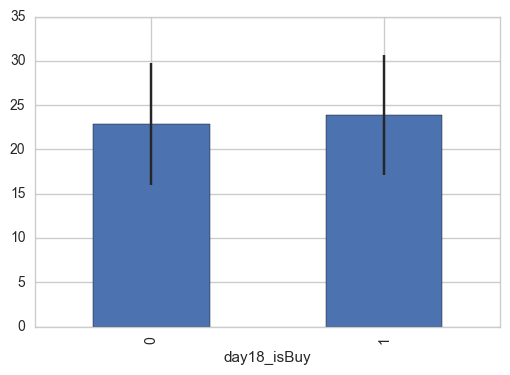

In [4]:
user_active_totaldays=user_df[['user_id','date']].drop_duplicates().groupby('user_id',as_index=False).count()

day18_buy_active_totaldays=day18_positive.merge(user_active_totaldays,how='left',on=['user_id'],)
day18_notbuy_active_totaldays=day18_negative.merge(user_active_totaldays,how='left',on=['user_id'],)

avgerage_active_totaldays = DataFrame([day18_notbuy_active_totaldays.date.mean(),day18_buy_active_totaldays.date.mean()])
std_active_totaldays      = DataFrame([day18_notbuy_active_totaldays.date.std(),day18_buy_active_totaldays.date.std()])

avgerage_active_totaldays.index.names = ["day18_isBuy"]
avgerage_active_totaldays.plot(yerr=std_active_totaldays,kind='bar',legend=False)


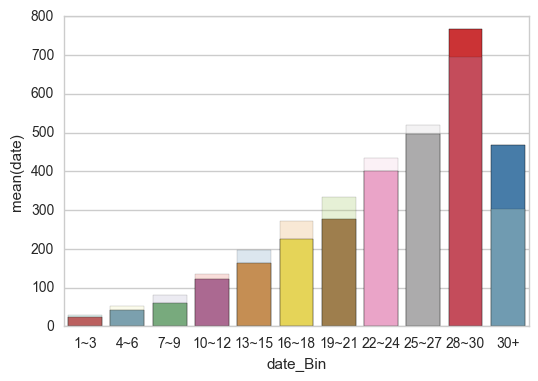

In [5]:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()
  #利用最大值和最小值创建分箱点的列表
  break_points = [minval] + cut_points + [maxval]
  #如果没有标签，则使用默认标签0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)
  #使用pandas的cut功能分箱
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

cut_points = [3,6,9,12,15,18,21,24,27,30]
labels = ["1~3","4~6","7~9","10~12","13~15","16~18","19~21","22~24","25~27","28~30","30+"]


user_active_totaldays=user_df[['user_id','date']].drop_duplicates().groupby('user_id',as_index=False).count()
day18_buy_active_totaldays=day18_positive.merge(user_active_totaldays,how='left',on=['user_id'],)
day18_notbuy_active_totaldays=day18_negative.merge(user_active_totaldays,how='left',on=['user_id'],)

day18_buy_active_totaldays["date_Bin"] = binning(day18_buy_active_totaldays["date"], cut_points, labels)
day18_notbuy_active_totaldays["date_Bin"] = binning(day18_notbuy_active_totaldays["date"], cut_points, labels)

day18_buy_active_totaldays=day18_buy_active_totaldays.groupby('date_Bin',as_index=False).count()
day18_notbuy_active_totaldays=day18_notbuy_active_totaldays.groupby('date_Bin',as_index=False).count()

sns.barplot(day18_buy_active_totaldays.date_Bin, day18_buy_active_totaldays.date,palette="Set1")
sns.barplot(day18_notbuy_active_totaldays.date_Bin, day18_notbuy_active_totaldays.date,palette="Set3",alpha=.3)

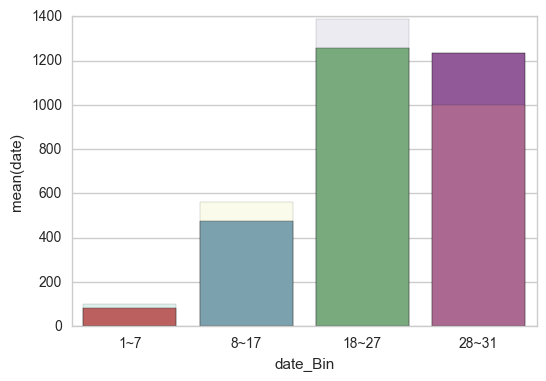

In [6]:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()
  #利用最大值和最小值创建分箱点的列表
  break_points = [minval] + cut_points + [maxval]
  #如果没有标签，则使用默认标签0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)
  #使用pandas的cut功能分箱
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

cut_points = [7,17,27]
labels = ["1~7","8~17","18~27","28~31"]


user_active_totaldays=user_df[['user_id','date']].drop_duplicates().groupby('user_id',as_index=False).count()
day18_buy_active_totaldays=day18_positive.merge(user_active_totaldays,how='left',on=['user_id'],)
day18_notbuy_active_totaldays=day18_negative.merge(user_active_totaldays,how='left',on=['user_id'],)

day18_buy_active_totaldays["date_Bin"] = binning(day18_buy_active_totaldays["date"], cut_points, labels)
day18_notbuy_active_totaldays["date_Bin"] = binning(day18_notbuy_active_totaldays["date"], cut_points, labels)

day18_buy_active_totaldays=day18_buy_active_totaldays.groupby('date_Bin',as_index=False).count()
day18_notbuy_active_totaldays=day18_notbuy_active_totaldays.groupby('date_Bin',as_index=False).count()

sns.barplot(day18_buy_active_totaldays.date_Bin, day18_buy_active_totaldays.date,palette="Set1")
sns.barplot(day18_notbuy_active_totaldays.date_Bin, day18_notbuy_active_totaldays.date,palette="Set3",alpha=.3)

### 从以上可以看出，无论按总月、三天或者一星期进行统计用户活跃的天数都没有多大意义，当天是否购买的用户与没购买的用户在这个月内活跃天数数量上区分度不大
--------------------------------------------------------------------------
### 下面统计当天购买及未购买的用户的最后活跃日期

In [7]:
later_hot_day=user_df[['user_id','date']][user_df.date<'2014-12-18'].sort_values(['user_id','date'],ascending=False).drop_duplicates('user_id')
buy_day=pd.to_datetime('2014-12-18')
def daydiff(day):
    return (buy_day-day).days
later_hot_day['days_to_buyday']=later_hot_day.date.map(daydiff).astype(int)

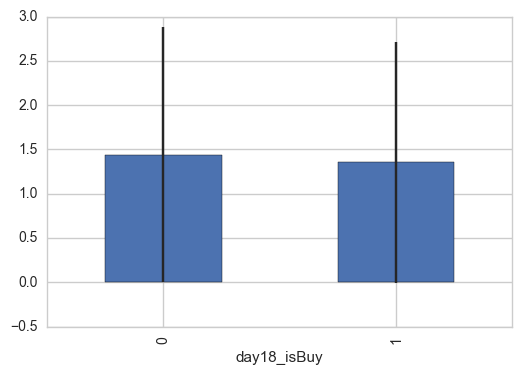

In [8]:
day18_buy_rencently_active_day=day18_positive.merge(later_hot_day,how='left',on=['user_id'],)
day18_notbuy_rencently_active_day=day18_negative.merge(later_hot_day,how='left',on=['user_id'])

avgerage_rencently_active_day = DataFrame([day18_notbuy_rencently_active_day.days_to_buyday.mean(),day18_buy_rencently_active_day.days_to_buyday.mean()])
std_rencently_active_day      = DataFrame([day18_notbuy_rencently_active_day.days_to_buyday.std(),day18_buy_rencently_active_day.days_to_buyday.std()])

avgerage_rencently_active_day.index.names = ["day18_isBuy"]
avgerage_rencently_active_day.plot(yerr=std_rencently_active_day,kind='bar',legend=False)


### 从以上看出，平均数与方差都相差不大，那么离购买日期最近的活跃日期距离的天数这个指标作用不大
----------------------------------------------------------------------
### 下面不看最近活跃日期，而看最近的购买日期，看看是否有差别

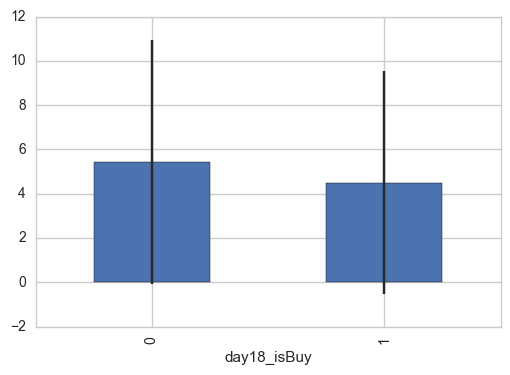

In [9]:
later_buy_day=user_df[['user_id','date']][(user_df.date<'2014-12-18')&(user_df.buy>0)].sort_values(['user_id','date'],ascending=False).drop_duplicates('user_id')
buy_day=pd.to_datetime('2014-12-18')
def daydiff(day):
    return (buy_day-day).days
later_buy_day['days_to_buyday']=later_buy_day.date.map(daydiff).astype(int)

day18_buy_rencently_buy_day=day18_positive.merge(later_buy_day,how='left',on=['user_id'])
day18_notbuy_rencently_buy_day=day18_negative.merge(later_buy_day,how='left',on=['user_id'])

avgerage_rencently_buy_day = DataFrame([day18_notbuy_rencently_buy_day.days_to_buyday.mean(),day18_buy_rencently_buy_day.days_to_buyday.mean()])
std_rencently_buy_day      = DataFrame([day18_notbuy_rencently_buy_day.days_to_buyday.std(),day18_buy_rencently_buy_day.days_to_buyday.std()])

avgerage_rencently_buy_day.index.names = ["day18_isBuy"]
avgerage_rencently_buy_day.plot(yerr=std_rencently_buy_day,kind='bar',legend=False)

### 以上可以看出，在18号买了的用户中，会在更短的前几天内有过购买行为，虽然平均数相差在一天内，但是方差达到了2天左右，这个指标波动相对来说比较大，可以作为一个特征使用。
---------------------------------------------------------------
### 下面进行更细粒度分析，分别从一周内浏览、收藏、加购以及购买四种行为进行分析

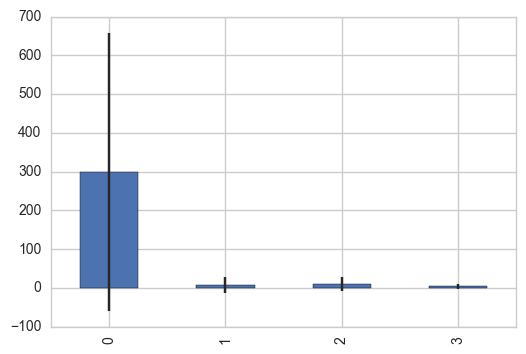

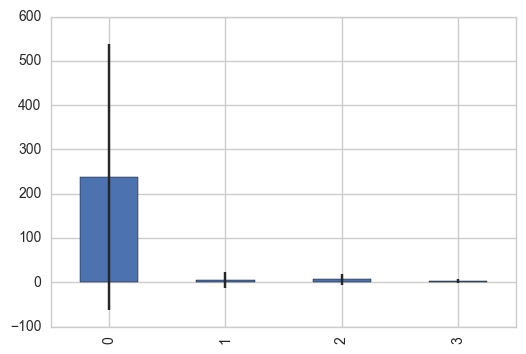

In [29]:
user_detail=user_df[['user_id','view','favor','addcar','buy']][(user_df.date>'2014-12-12')&(user_df.date<'2014-12-18')].groupby('user_id',as_index=False).sum().sort_values(['buy'],ascending=False)

day18buy_3days_user_detail=day18_positive.merge(user_detail,how='left',on=['user_id']).fillna(0)
day18notbuy_3days_user_detail=day18_negative.merge(user_detail,how='left',on=['user_id']).fillna(0)

day18buy_3days_user_detail_average=DataFrame([day18buy_3days_user_detail.view.mean(),day18buy_3days_user_detail.favor.mean(),day18buy_3days_user_detail.addcar.mean(),day18buy_3days_user_detail.buy.mean(),])
day18buy_3days_user_detail_std    =DataFrame([day18buy_3days_user_detail.view.std(),day18buy_3days_user_detail.favor.std(),day18buy_3days_user_detail.addcar.std(),day18buy_3days_user_detail.buy.std(),])

day18buy_3days_user_detail_average.plot(yerr=day18buy_3days_user_detail_std,kind='bar',legend=False)

day18notbuy_3days_user_detail_average=DataFrame([day18notbuy_3days_user_detail.view.mean(),day18notbuy_3days_user_detail.favor.mean(),day18notbuy_3days_user_detail.addcar.mean(),day18notbuy_3days_user_detail.buy.mean(),])
day18notbuy_3days_user_detail_std    =DataFrame([day18notbuy_3days_user_detail.view.std(),day18notbuy_3days_user_detail.favor.std(),day18notbuy_3days_user_detail.addcar.std(),day18notbuy_3days_user_detail.buy.std(),])

day18notbuy_3days_user_detail_average.plot(yerr=day18notbuy_3days_user_detail_std,kind='bar',legend=False)


### 两图辨识度不是很高，但是仔细看可以看出，18号购买了的用户在这一周内，活跃度还是要稍微高于18号当天没购买的那些用户的，
---------------------------------------
### 接着看看转化率上的关系

In [79]:
user_tranpec_detail=user_df[['user_id','view','favor','addcar','buy']][user_df.date<'2014-12-18'].groupby('user_id',as_index=False).sum().sort_values(['buy'],ascending=False)
user_tranpec_detail['tran_view_pec']=user_tranpec_detail['buy']/(user_tranpec_detail['view']+1)
user_tranpec_detail['tran_favor_pec']=user_tranpec_detail['buy']/(user_tranpec_detail['favor']+1)
user_tranpec_detail['tran_addcar_pec']=user_tranpec_detail['buy']/(user_tranpec_detail['addcar']+1)

day18buy_user_tranpec_detail=day18_positive.merge(user_tranpec_detail,how='left',on=['user_id'])
day18notbuy_user_tranpec_detail=day18_negative.merge(user_tranpec_detail,how='left',on=['user_id'])

day18buy_user_tranpec_average=DataFrame([day18buy_user_tranpec_detail['tran_view_pec'].mean(),day18buy_user_tranpec_detail['tran_favor_pec'].mean(),day18buy_user_tranpec_detail['tran_addcar_pec'].mean()])
day18notbuy_user_tranpec_average=DataFrame([day18notbuy_user_tranpec_detail['tran_view_pec'].mean(),day18notbuy_user_tranpec_detail['tran_favor_pec'].mean(),day18notbuy_user_tranpec_detail['tran_addcar_pec'].mean()])

day18buy_user_tranpec_average.columns=['per_buy']
day18notbuy_user_tranpec_average.columns=['per_notbuy']
day18buy_user_tranpec_average.join(day18notbuy_user_tranpec_average)

,per_buy,per_notbuy
0,0.018823,0.014282
1,5.390467,3.953673
2,1.136233,0.957460


### 从以上平均转化率可以看出，18号买了的用户，浏览、收藏、加购的平均转化率均要高于18号没买的，这是去除了18号当天的数据所得出的数据，可以看出，相当一部分人是属于经常使用淘宝的用户。